## Where is the University of California Getting it's Insurance?

This notebook analyses UC insurance contracts obtained by a freedom of information act inquiry.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawdata_filename = 'CPRA #20-3063 9.23.2020.xlsx'

In [3]:
# Load all sheets
rawdata_excel = pd.read_excel(rawdata_filename, sheet_name=None)

In [4]:
# Get sheet names
sheet_names = list(rawdata_excel.keys())
sheet_names

['UC Regents Policies',
 'Fiat Lux Policies',
 'UC Construction Policies',
 'Fees']

### Let's look at the UC Regents Policies first

In [5]:
#Clean up the header and label the renewal date column
regents_policies = pd.read_excel(rawdata_filename, sheet_name=sheet_names[0], header=2)

#There are trailing spaces in some of the column names in the raw datafile

#Rename the columns
regents_policies.rename(columns={'Policy ': 'Policy',
                                 'Carrier ': 'Carrier',
                                 'Premium ': 'Premium',
                                 'Unnamed: 3': "Renewal"}, inplace=True)
regents_policies

,Policy,Carrier,Premium,Renewal
0,Aviation-Aiport General Liability,Chubb,75002.00,NaN
1,Unmanned Aerial Vehicle Liability,Chubb,35000.00,NaN
2,Nuclear Liability,ANO,18743.00,NaN
3,Employment Practices Liability,Allied World,667575.00,NaN
4,NaN,Beazley,496890.63,NaN
...,...,...,...,...
61,UCIP General Liability,American International Group Inc,184090.00,NaN
62,NaN,Liberty Mutual Insurance Company,935455.00,NaN
63,NaN,Zurich American Insurance Company,51577.00,NaN
64,UCIP Workers Comp,Liberty Mutual Insurance Company,2734238.00,NaN


In [6]:
#Clean up data types
regents_policies = regents_policies.convert_dtypes()

In [7]:
regents_policies

,Policy,Carrier,Premium,Renewal
0,Aviation-Aiport General Liability,Chubb,75002.00,<NA>
1,Unmanned Aerial Vehicle Liability,Chubb,35000.00,<NA>
2,Nuclear Liability,ANO,18743.00,<NA>
3,Employment Practices Liability,Allied World,667575.00,<NA>
4,<NA>,Beazley,496890.63,<NA>
...,...,...,...,...
61,UCIP General Liability,American International Group Inc,184090.00,<NA>
62,<NA>,Liberty Mutual Insurance Company,935455.00,<NA>
63,<NA>,Zurich American Insurance Company,51577.00,<NA>
64,UCIP Workers Comp,Liberty Mutual Insurance Company,2734238.00,<NA>


In [8]:
regents_policies.iloc[30:40, 3]

30                                    *renewed 3/1/2020
31                                    *renewed 3/1/2020
32    *renewed 3/1/2020 Minimum Premium - events bas...
33    *renewed 3/1/2020 Minimum Premium - events bas...
34                                   *renews 11/01/2020
35                                   *renews 11/01/2020
36                                   *renews 11/01/2020
37                                   *renews 11/01/2020
38                                   *renews 11/01/2020
39                                   *renews 11/01/2020
Name: Renewal, dtype: string

In [9]:
regents_policies[regents_policies['Renewal'].str.contains('renew')]

,Policy,Carrier,Premium,Renewal
29,Foreign Liabiliy,AIG,286198.0,* renews 10/01/2020
30,Rec Sports GL,Philadelphia,157778.0,*renewed 3/1/2020
31,Registered Student Orgs On Campus GL,Philadelphia,447901.0,*renewed 3/1/2020
32,Registered Student Orgs Off Campus GL,Philadelphia,2000.0,*renewed 3/1/2020 Minimum Premium - events bas...
33,TULIP,Philadelphia,2000.0,*renewed 3/1/2020 Minimum Premium - events bas...
34,Regents Side A Directors & Officers,Chubb,222628.0,*renews 11/01/2020
35,Fiduciary Liability,Chubb,222000.0,*renews 11/01/2020
36,<NA>,RLI,175000.0,*renews 11/01/2020
37,<NA>,Starr Indemnity,115500.0,*renews 11/01/2020
38,<NA>,QBE,97000.0,*renews 11/01/2020


In [10]:
#Pull out dates
def get_renewal_date(string):
    
    return string.split(' ')[1]

There is a space after the '*' in row 29, row 33 of the original datafile.

In [11]:
# There is a space after the '*' in row 29, row 33 of the original datafile.
regents_policies.loc[29, 'Renewal'] = regents_policies.loc[29, 'Renewal'].replace('* ', '*')

In [12]:
#Pull out dates
regents_policies[regents_policies['Renewal'].str.contains('renew')]['Renewal'].apply(lambda x: get_renewal_date(x))

29    10/01/2020
30      3/1/2020
31      3/1/2020
32      3/1/2020
33      3/1/2020
34    11/01/2020
35    11/01/2020
36    11/01/2020
37    11/01/2020
38    11/01/2020
39    11/01/2020
40    11/01/2020
41    11/01/2020
42    11/01/2020
43    11/01/2020
Name: Renewal, dtype: object

In [13]:
# Make a new column for renewal dates
regents_policies['Renewal Date'] = '<NA>'

# Pull out the actual renewal dates
regents_policies.loc[29:43, 'Renewal Date'] = regents_policies[regents_policies['Renewal'].str.contains('renew')]['Renewal'].apply(lambda x: get_renewal_date(x))

#Convert to datetime.  - THIS IS NOT WORKING
regents_policies['Renewal Date']  = pd.to_datetime(regents_policies['Renewal Date'], errors='ignore')

In [14]:
regents_policies.dtypes

Policy           string
Carrier          string
Premium         float64
Renewal          string
Renewal Date     object
dtype: object

In [15]:
#Drop useless column
regents_policies = regents_policies.drop(columns=['Renewal'])

In [16]:
#So which companies are we paying and how much?

In [17]:
import matplotlib.ticker as ticker

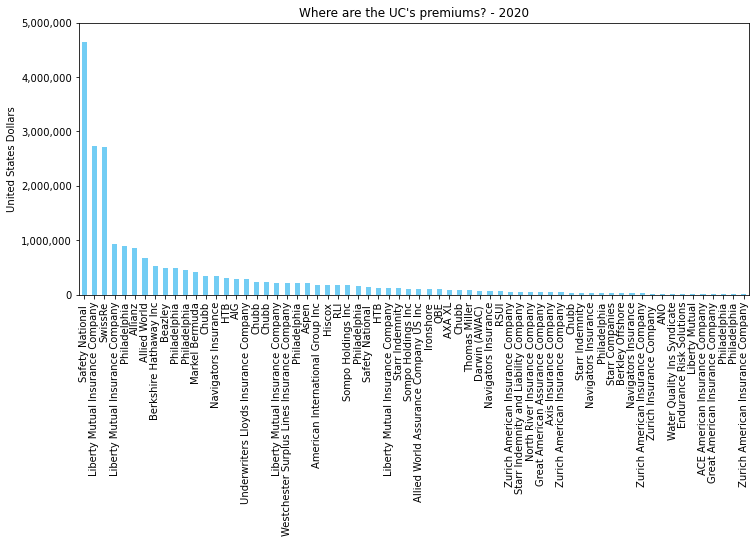

In [36]:
df = regents_policies
df = df.sort_values('Premium', ascending=False)

df.plot.bar('Carrier', 'Premium', figsize=(12, 5), color='#72CDF4');
plt.title("Where are the UC's premiums? - 2020")
plt.legend().remove();
plt.xlabel(None)
plt.ylabel('United States Dollars');

#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.ylim(0, 5000000);

In [38]:
# What are the biggest premiums covering?
df.head(5)

,Policy,Carrier,Premium,Renewal Date
19,Excess Work Comp,Safety National,4654539.0,<NA>
64,UCIP Workers Comp,Liberty Mutual Insurance Company,2734238.0,<NA>
21,Earthquake,SwissRe,2710312.5,<NA>
62,<NA>,Liberty Mutual Insurance Company,935455.0,<NA>
26,UC Foundations Package,Philadelphia,901426.0,<NA>


"Projects with a projected construction value of $25 million and over (total for all phases) are to be insured under the University Controlled Insurance Program, or “UCIP.”  The UCIP is a single insurance program that insures the University of California, Enrolled Contractors, Enrolled Subcontractors, and other designated parties (“Contractors”) for Work performed at the Project Site."

https://www.ucop.edu/construction-services/programs-and-processes/university-controlled-insurance-program/ucip.html

In [20]:
#When are the next big renewals?

In [21]:
#The only renewal dates left are November 1st
#Chubb is the biggest vendor.

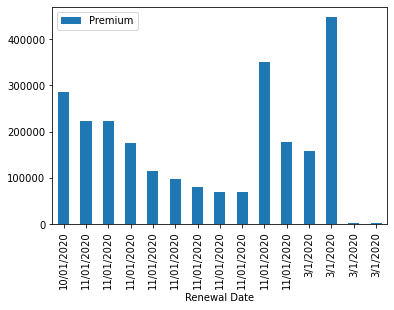

In [22]:
df = regents_policies
df = df[df['Renewal Date']!='<NA>']

#Sort by date - This is not Working
df = df.sort_values('Renewal Date', ascending=False).reset_index()
df.plot.bar('Renewal Date', 'Premium');

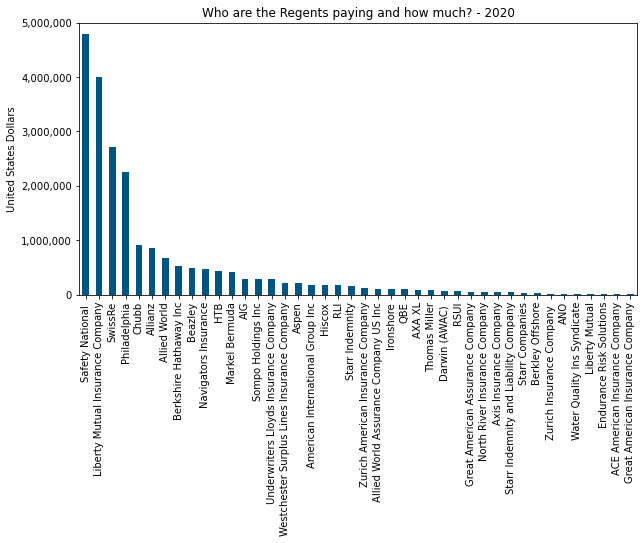

In [39]:
#What if you group the premiums?
df = regents_policies
df = df.groupby('Carrier').sum()
df = df.sort_values('Premium', ascending=False).reset_index()

df.plot.bar('Carrier', 'Premium', figsize=(10,5), color='#005581');
plt.title('Who are the Regents paying and how much? - 2020')
plt.legend().remove();
plt.xlabel(None)
plt.ylabel('United States Dollars');

#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.ylim(0, 5000000);

In [24]:
## What about the other sheets?

In [25]:
#Clean up the header and label the renewal date column
fiatlux_policies = pd.read_excel(rawdata_filename, sheet_name=sheet_names[1], header=2)

#Rename the columns
fiatlux_policies.rename(columns={'Policy ': 'Policy',
                                 'Carrier ': 'Carrier',
                                 'Premium ': 'Premium',
                                 'Unnamed: 3': "Renewal"}, inplace=True)

fiatlux_policies

,Policy,Carrier,Premium,Renewal
0,Cyber,Brit Axis,1300915.93,NaN
1,NaN,AXA XL,566985.00,NaN
2,NaN,Hiscox Markel,938212.10,NaN
3,NaN,Channel Barnican,371700.00,NaN
4,NaN,Starr Indemnity,180894.00,NaN
5,NaN,ECHO,456907.06,NaN
6,Sexual Molestaton Liability,Beazley,897645.00,NaN
7,Terrorism,Talbot,249775.00,NaN
8,All Risk Property,Zurich American Insurance Company,5548846.00,NaN
9,Boiler and Machinery,Travelers,713890.00,NaN


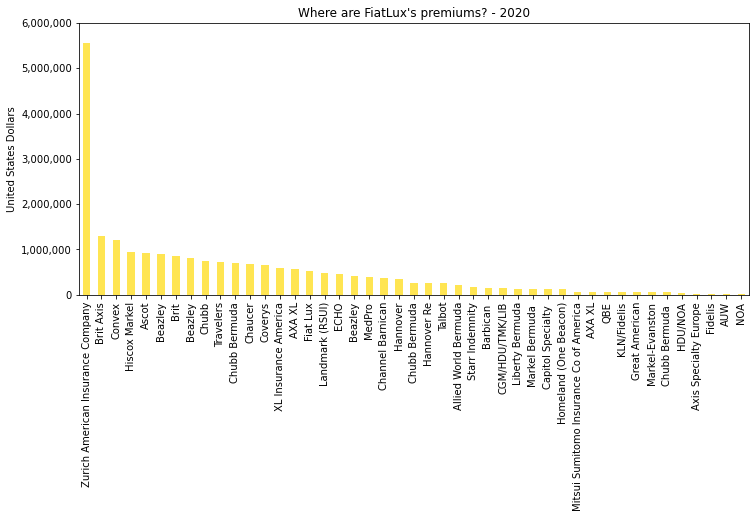

In [40]:
df = fiatlux_policies
df = df.sort_values('Premium', ascending=False)

df.plot.bar('Carrier', 'Premium', figsize=(12, 5), color='#FFE552');
plt.title("Where are FiatLux's premiums? - 2020")
plt.legend().remove();
plt.xlabel(None)
plt.ylabel('United States Dollars');

#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.ylim(0, 6000000);

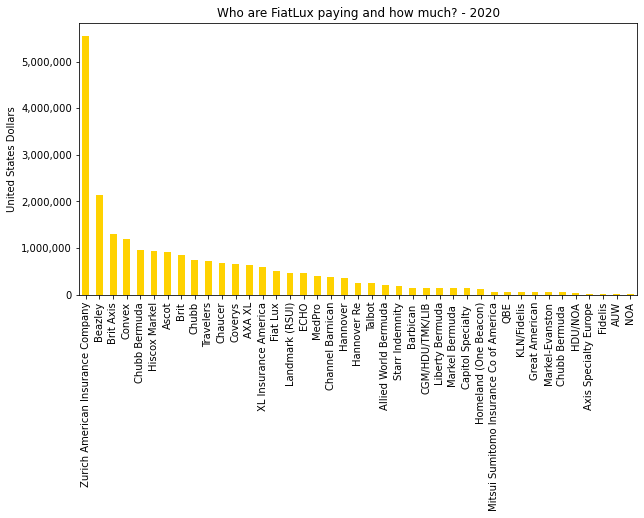

In [41]:
#What if you group the premiums?
df = fiatlux_policies
df = df.groupby('Carrier').sum()
df = df.sort_values('Premium', ascending=False).reset_index()

df.plot.bar('Carrier', 'Premium', figsize=(10,5), color='#FFD200');
plt.title('Who are FiatLux paying and how much? - 2020')
plt.legend().remove();
plt.xlabel(None)
plt.ylabel('United States Dollars');

#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
#plt.ylim(0, 5000000);

In [28]:
# Can these companies be grouped more coursely?

In [29]:
uc_construction = pd.read_excel(rawdata_filename, sheet_name=sheet_names[2], header=2)

#Rename the columns
uc_construction.rename(columns={'COVERAGE TYPE': 'Policy',
                                 'INSURANCE COMPANY': 'Carrier',
                                 'PREMIUM': 'Premium'}, inplace=True)

uc_construction

,Policy,Carrier,Premium
0,Builder's Risk,Allianz,859694
1,NaN,Liberty Mutual Insurance Company,119922
2,NaN,Starr Companies,22633
3,NaN,Underwriters Lloyds Insurance Company,282270
4,NaN,Westchester Surplus Lines Insurance Company,218250
5,NaN,Zurich American Insurance Company,1964
6,Contractors Pollution Liability,Great American Insurance Company,5038
7,UCIP Excess Liability,ACE American Insurance Company,6759
8,NaN,Allied World Assurance Company US Inc,110666
9,NaN,Axis Insurance Company,50000


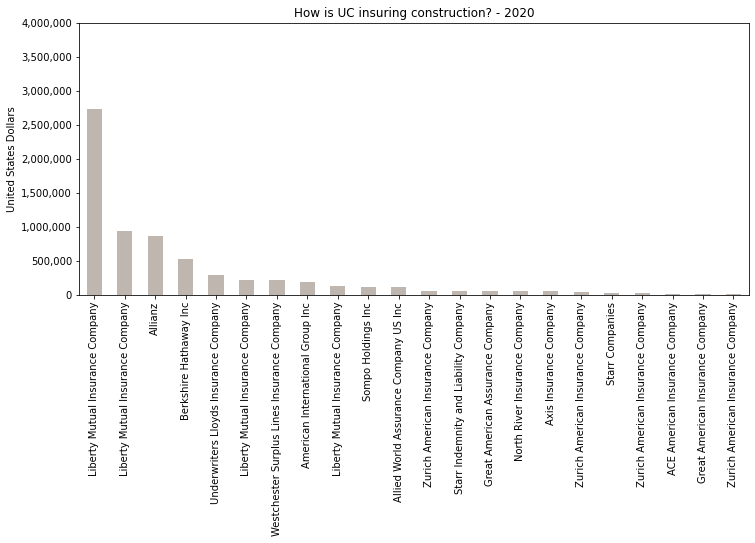

In [42]:
df = uc_construction
df = df.sort_values('Premium', ascending=False)

df.plot.bar('Carrier', 'Premium', figsize=(12, 5), color='#BEB6AF');
plt.title("How is UC insuring construction? - 2020")
plt.legend().remove();
plt.xlabel(None)
plt.ylabel('United States Dollars');

#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.ylim(0, 4000000);

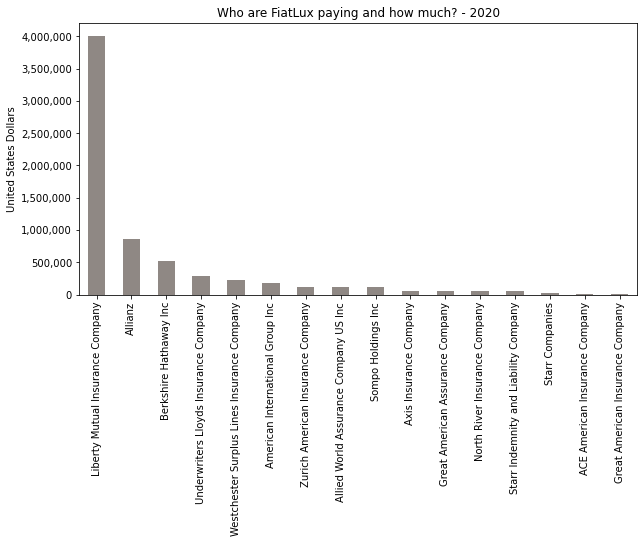

In [43]:
#What if you group the premiums?
df = uc_construction
df = df.groupby('Carrier').sum()
df = df.sort_values('Premium', ascending=False).reset_index()

df.plot.bar('Carrier', 'Premium', figsize=(10,5), color='#8F8884');
plt.title('Who are FiatLux paying and how much? - 2020')
plt.legend().remove();
plt.xlabel(None)
plt.ylabel('United States Dollars');

#Give dollars with zeros and commas
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
#plt.ylim(0, 5000000);

In [32]:
#How much are we paying Liberty Mutual in total?
combined = pd.concat([regents_policies, fiatlux_policies, uc_construction])

# Remove unnecessary columns
combined = combined.drop(columns = ['Renewal Date', 'Renewal'])

totals = combined.groupby(by='Carrier').sum().sort_values('Premium').reset_index()
totals

,Carrier,Premium
0,Great American Insurance Company,10076.00
1,NOA,10500.00
2,AUW,11750.00
3,Liberty Mutual,12650.00
4,Endurance Risk Solutions,12650.00
...,...,...
72,Beazley,2628937.63
73,SwissRe,2710312.50
74,Safety National,4794656.00
75,Zurich American Insurance Company,5774554.00


## UC paid Liberty Mutual over 8,000,000 dollars in 2020.

"Liberty Mutual is a top global insurer of coal, oil, and gas. It also invests more than \\$8.9 billion in fossil fuel companies and utilities, including $1.5 billion in thermal coal. Yet, while fueling the climate crisis, Liberty Mutual is withdrawing coverage from and jacking up the costs of insurance for longtime customers in areas at risk of climate change impacts, like wildfire-affected counties in California."

https://www.ran.org/press-releases/insure-our-future-campaign-targets-liberty-mutual/

In [34]:
brokers = pd.read_excel(rawdata_filename, sheet_name=sheet_names[3])

#Rename the columns
brokers.rename(columns={'Unnamed: 2': 'Renewal'}, inplace=True)
brokers

,Broker,Annual Fee,Renewal
0,Alliant,1056750,NaN
1,Marsh,2265000,NaN
2,WTW,1408997,*Paid in 2019.


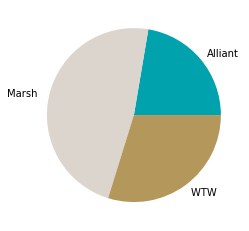

In [35]:
#The largest broker fee goes to Marsh who also continue to support fossil fuel projects
brokers.plot.pie(x = 'Broker', y='Annual Fee', labels=brokers.Broker, colors=['#00A3AD', '#DBD5CD', '#B4975A']);
plt.legend().remove();
plt.ylabel(None);

#WTW is Willis Towers Watson (insurance broker for the titanic)